In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [14]:
%run connect_four_with_min_max.py
%run constants.py

In [15]:
diagonal_shifts

xrange(-2, 4)

### Statistics, collected during previous project

In [16]:
    x_stat = [[0.0015, 0.0015, 0.0013, 0.0013, 0.0014, 0.0015, 0.0015],
              [0.0058, 0.0058, 0.0059, 0.0062, 0.0058, 0.0059, 0.0059],
              [0.0177, 0.0172, 0.0176, 0.0193, 0.0179, 0.0176, 0.0176],
              [0.0255, 0.028, 0.0299, 0.0312, 0.0299, 0.0283, 0.0254],
              [0.035, 0.0379, 0.0412, 0.0447, 0.0409, 0.0382, 0.0352],
              [0.0455, 0.0488, 0.0525, 0.0597, 0.0521, 0.0486, 0.0453]]

In [17]:
def play_min_max_game(depth=2):
    global x_wins
    global o_wins
    global draws
    global win_pos_x
    global win_pos_o

    game = ConnectFourGame(depth, x_stat)
    player = 1
    mvcntr = 1
    no_winner_yet = True

    while game.move_still_possible() and no_winner_yet:
        # get player symbol
        name = symbols[player]
        #print '%s moves' % name

        # let player move at random
        if player == 1:
            prev_state = game.game_state
            game.make_min_max_move(player)
            cur_state = game.game_state
            lastInserted_x, lastInserted_y = np.where(
                np.not_equal(prev_state, cur_state))
            game.last_inserted_row = lastInserted_x[0]
            game.last_inserted_column = lastInserted_y[0]
        else:
            game.make_move(player)

        # print current game state
        #game.print_game_state()

        # evaluate game state

        if game.move_was_winning_move(player):
            #print 'player %s wins after %d moves' % (name, mvcntr)
            no_winner_yet = False
            if player == 1:
                x_wins +=1
            else:
                o_wins += 1

        # switch player and increase move counter
        player *= -1
        mvcntr += 1

    if no_winner_yet:
        #print 'game ended in a draw'
        draws+=1

In [2]:
import matplotlib.pyplot as plt

In [21]:
x_wins = 0
o_wins = 0
draws = 0
win_pos_x = 0
win_pos_o = 0
start_time = time.time()
for i in xrange(10000):
    play_min_max_game(1)
end_time = time.time()
print x_wins
print o_wins
print draws
print (start_time - end_time)/60.0

9217
783
0
-5.33765748342


## Minmax with statistics

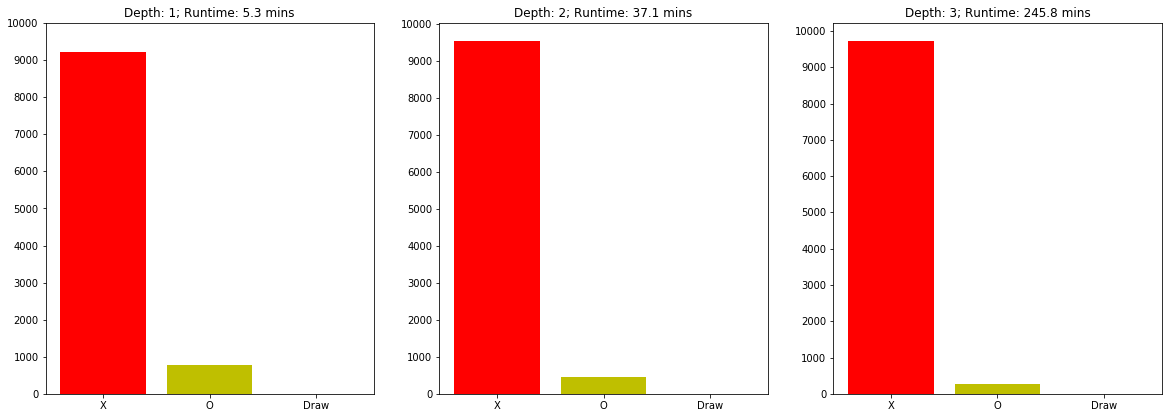

In [12]:
res1 = [9217, 783, 0, 5.3]
res2 = [9538, 461, 1, 37.1]
res3 = [9730, 268, 2, 245.8]

overall = [res1, res2, res3]
plt.subplots(1, 3, figsize=(20, 15))
k = 1
for i in overall:
    x = np.arange(3)
    res = i[0:3]
    time = i[3]
    plt.subplot(2, 3, k)
    k+=1
    plt.bar(x, res,color=['r', 'y', 'b'])
    plt.xticks(x, ('X', 'O', 'Draw'))
    plt.yticks(np.arange(0, 11000, 1000))
    plt.title("Depth: " + str(k - 1) + '; Runtime: ' + str(time) + ' mins')

plt.show()

In [22]:
x_wins = 0
o_wins = 0
draws = 0
win_pos_x = 0
win_pos_o = 0
start_time = time.time()
for i in xrange(10000):
    play_min_max_game(2)
end_time = time.time()
print x_wins
print o_wins
print draws
print (start_time - end_time)/60.0

9538
461
1
-37.1016686002


In [23]:
x_wins = 0
o_wins = 0
draws = 0
win_pos_x = 0
win_pos_o = 0
start_time = time.time()
for i in xrange(10000):
    play_min_max_game(3)
end_time = time.time()
print x_wins
print o_wins
print draws
print (start_time - end_time)/60.0

9730
268
2
-245.813827399


In [24]:
%run connect_four_with_min_max.py

In [25]:
x_wins = 0
o_wins = 0
draws = 0
win_pos_x = 0
win_pos_o = 0
start_time = time.time()
for i in xrange(10000):
    play_min_max_game(1)
end_time = time.time()
print x_wins
print o_wins
print draws
print (start_time - end_time)/60.0

8973
1027
0
-3.59794868628


In [26]:
x_wins = 0
o_wins = 0
draws = 0
win_pos_x = 0
win_pos_o = 0
start_time = time.time()
for i in xrange(10000):
    play_min_max_game(2)
end_time = time.time()
print x_wins
print o_wins
print draws
print (start_time - end_time)/60.0

9617
383
0
-26.6393197497


In [27]:
x_wins = 0
o_wins = 0
draws = 0
win_pos_x = 0
win_pos_o = 0
start_time = time.time()
for i in xrange(10000):
    play_min_max_game(3)
end_time = time.time()
print x_wins
print o_wins
print draws
print (start_time - end_time)/60.0

9502
496
2
-203.292250137


## Baseline minmax

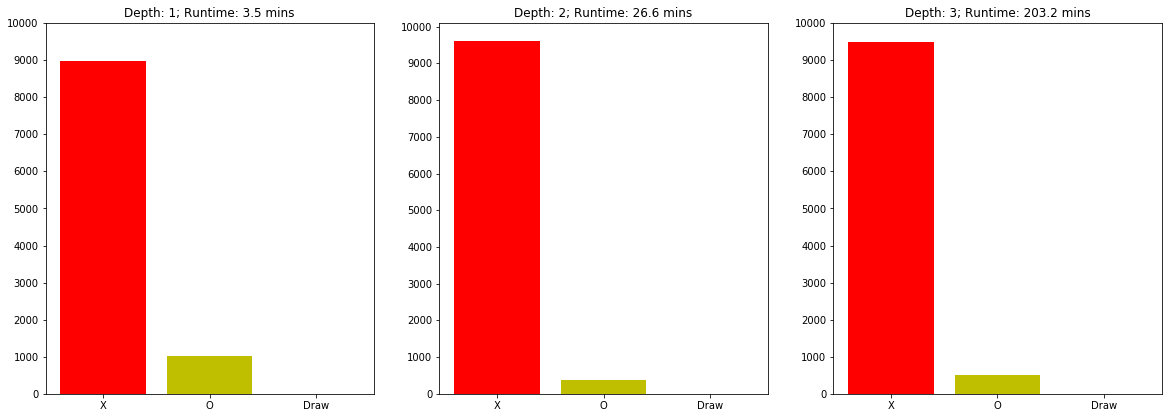

In [13]:
res1 = [8973, 1027, 0, 3.5]
res2 = [9617, 383, 0, 26.6]
res3 = [9502, 496, 2, 203.2]

overall = [res1, res2, res3]
plt.subplots(1, 3, figsize=(20, 15))
k = 1
for i in overall:
    x = np.arange(3)
    res = i[0:3]
    time = i[3]
    plt.subplot(2, 3, k)
    k+=1
    plt.bar(x, res,color=['r', 'y', 'b'])
    plt.xticks(x, ('X', 'O', 'Draw'))
    plt.yticks(np.arange(0, 11000, 1000))
    plt.title("Depth: " + str(k - 1) + '; Runtime: ' + str(time) + ' mins')

plt.show()